# Preprocessing and Modeling

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32

In [3]:
FILENAMES = tf.io.gfile.glob("data/*.tfrec")

print("Train TFRecord Files:", len(FILENAMES))

Train TFRecord Files: 256


In [4]:
#https://keras.io/examples/keras_recipes/tfrecord/

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [768,768])
    return image

In [5]:
image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'image_id': tf.io.FixedLenFeature([], tf.string),
    'No Finding': tf.io.FixedLenFeature([], tf.int64),
    'Atelectasis': tf.io.FixedLenFeature([], tf.int64),
    'Consolidation': tf.io.FixedLenFeature([], tf.int64),
    'Infiltration': tf.io.FixedLenFeature([], tf.int64),
    'Pneumothorax': tf.io.FixedLenFeature([], tf.int64),
    'Edema': tf.io.FixedLenFeature([], tf.int64),
    'Emphysema': tf.io.FixedLenFeature([], tf.int64),
    'Fibrosis': tf.io.FixedLenFeature([], tf.int64),
    'Effusion': tf.io.FixedLenFeature([], tf.int64),
    'Pneumonia': tf.io.FixedLenFeature([], tf.int64),
    'Pleural_Thickening': tf.io.FixedLenFeature([], tf.int64),
    'Cardiomegaly': tf.io.FixedLenFeature([], tf.int64),
    'Nodule': tf.io.FixedLenFeature([], tf.int64),
    'Mass': tf.io.FixedLenFeature([], tf.int64),
    'Hernia': tf.io.FixedLenFeature([], tf.int64)}



def read_tfrecord(example):
    example = tf.io.parse_single_example(example, image_feature_description)
    image = decode_image(example["image"])
    No_Finding = example['No Finding']
    Atelectasis = example['Atelectasis']
    Consolidation = example['Consolidation']
    Infiltration = example['Infiltration']
    Pneumothorax = example['Pneumothorax']
    Edema = example['Edema']
    Emphysema = example['Emphysema']
    Fibrosis = example['Fibrosis']
    Effusion = example['Effusion']
    Pneumonia = example['Pneumonia']
    Pleural_Thickening = example['Pleural_Thickening']
    Cardiomegaly = example['Cardiomegaly']
    Nodule = example['Nodule']
    Mass = example['Mass']
    Hernia = example['Hernia']
       
    if No_Finding == 0:
        label = 1
    else:
        label = 0

    return image, label

In [6]:
def load_dataset(filenames):
    ignore_order = tf.data.Options()
    ignore_order.experimental_deterministic = False  # disable order, increase speed
    dataset = tf.data.TFRecordDataset(
        filenames
    )  # automatically interleaves reads from multiple files
    dataset = dataset.with_options(
        ignore_order
    )  # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [7]:
def get_dataset(filenames):
    dataset = load_dataset(filenames)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

In [8]:
train_dataset = get_dataset(FILENAMES)

In [9]:
def make_model():
    
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(768,768)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [10]:
model = make_model()

history = model.fit(
    train_dataset,
    epochs=3,
)

Epoch 1/3
3504/3504 [==============================] - 959s 274ms/step - loss: 0.6932 - accuracy: 0.5384
Epoch 2/3
3504/3504 [==============================] - 1051s 300ms/step - loss: 0.6931 - accuracy: 0.5384
Epoch 3/3
3504/3504 [==============================] - 1118s 319ms/step - loss: 0.6931 - accuracy: 0.5384


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


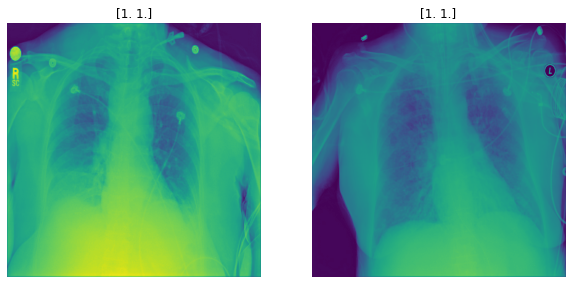

In [11]:
def show_batch_predictions(image_batch):
    plt.figure(figsize=(10, 10))
    for n in range(2):
        ax = plt.subplot(1, 2, n + 1)
        plt.imshow(image_batch[n] / 255.0)
        img_array = tf.expand_dims(image_batch[n], axis=0)
        plt.title(model.predict(img_array)[0])
        plt.axis("off")


image_batch, label_batch = next(iter(train_dataset))

show_batch_predictions(image_batch)

In [12]:
for element in train_dataset:
    print(element)
    break

(<tf.Tensor: shape=(32, 768, 768), dtype=float32, numpy=
array([[[  2.,   7.,   6., ...,  24.,  30.,  15.],
        [  6.,  10.,   9., ...,  35.,  41.,  26.],
        [  6.,  11.,  10., ...,  36.,  42.,  26.],
        ...,
        [  6.,  12.,  13., ...,  29.,  37.,  26.],
        [  8.,  14.,  14., ...,  33.,  41.,  29.],
        [  4.,  10.,  10., ...,  24.,  30.,  17.]],

       [[  1.,   1.,   1., ...,   2.,   1.,   0.],
        [  1.,   1.,   1., ...,   3.,   2.,   1.],
        [  1.,   1.,   1., ...,   3.,   3.,   2.],
        ...,
        [ 91., 138., 134., ...,  31.,  39.,  31.],
        [ 93., 137., 132., ...,  27.,  32.,  27.],
        [ 51.,  81.,  72., ...,  15.,  17.,  12.]],

       [[ 16.,  28.,  23., ...,   1.,   0.,   0.],
        [ 31.,  44.,  41., ...,   1.,   1.,   0.],
        [ 26.,  42.,  40., ...,   1.,   1.,   1.],
        ...,
        [125., 193., 193., ...,   2.,   1.,   1.],
        [133., 190., 193., ...,   1.,   1.,   0.],
        [ 69., 112., 109., ...,  